In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [25]:
NUM_CLASSES = 5

# 学習データ読み込み

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [31]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/4 [======>.......................] - ETA: 1s - loss: 1.7935 - accuracy: 0.1250
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 1s 116ms/step - loss: 1.7658 - accuracy: 0.1491 - val_loss: 1.6892 - val_accuracy: 0.1000
Epoch 2/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.6371 - accuracy: 0.2031
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 47ms/step - loss: 1.6800 - accuracy: 0.2108 - val_loss: 1.6664 - val_accuracy: 0.2077
Epoch 3/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.7066 - accuracy: 0.2500
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 51ms/step - loss: 1.6670 - accuracy: 0.2339 - val_loss: 1.6460 - val_accuracy: 0.2308
Epoch 4/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.6451 - accuracy: 0.2500
Epoch 4: sa

4/4 [==============================] - 0s 31ms/step - loss: 1.3158 - accuracy: 0.4447 - val_loss: 1.3542 - val_accuracy: 0.3615
Epoch 29/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.3308 - accuracy: 0.3984
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 22ms/step - loss: 1.3371 - accuracy: 0.4062 - val_loss: 1.3441 - val_accuracy: 0.3615
Epoch 30/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.2302 - accuracy: 0.4766
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 22ms/step - loss: 1.2933 - accuracy: 0.4190 - val_loss: 1.3348 - val_accuracy: 0.3615
Epoch 31/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.2905 - accuracy: 0.4688
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 21ms/step - loss: 1.2914 - accuracy: 0.4396 - val_loss: 1.

Epoch 56/1000
4/4 [==============================] - ETA: 0s - loss: 1.1588 - accuracy: 0.5167
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 57ms/step - loss: 1.1588 - accuracy: 0.5167 - val_loss: 1.0672 - val_accuracy: 0.7231
Epoch 57/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.1092 - accuracy: 0.6016
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 32ms/step - loss: 1.1472 - accuracy: 0.5553 - val_loss: 1.0613 - val_accuracy: 0.7462
Epoch 58/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.0896 - accuracy: 0.5703
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 31ms/step - loss: 1.1385 - accuracy: 0.5630 - val_loss: 1.0550 - val_accuracy: 0.7462
Epoch 59/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.0797 - accuracy: 0.5859
Epoch

1/4 [======>.......................] - ETA: 0s - loss: 1.1199 - accuracy: 0.5547
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 34ms/step - loss: 1.0778 - accuracy: 0.5861 - val_loss: 0.8827 - val_accuracy: 0.8077
Epoch 84/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.0006 - accuracy: 0.5859
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 32ms/step - loss: 1.0206 - accuracy: 0.6247 - val_loss: 0.8741 - val_accuracy: 0.8000
Epoch 85/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.0638 - accuracy: 0.5781
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 30ms/step - loss: 1.0272 - accuracy: 0.6067 - val_loss: 0.8668 - val_accuracy: 0.8000
Epoch 86/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.0539 - accuracy: 0.6406
Epoch 86: saving mo

1/4 [======>.......................] - ETA: 0s - loss: 0.9117 - accuracy: 0.6094
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 32ms/step - loss: 0.9216 - accuracy: 0.6221 - val_loss: 0.7360 - val_accuracy: 0.8000
Epoch 111/1000
1/4 [======>.......................] - ETA: 0s - loss: 1.0568 - accuracy: 0.5938
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 21ms/step - loss: 0.9738 - accuracy: 0.6350 - val_loss: 0.7319 - val_accuracy: 0.8000
Epoch 112/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.9373 - accuracy: 0.6172
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 23ms/step - loss: 0.9593 - accuracy: 0.6401 - val_loss: 0.7289 - val_accuracy: 0.8000
Epoch 113/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8877 - accuracy: 0.6953
Epoch 113: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.9905 - accuracy: 0.6406
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 26ms/step - loss: 0.8949 - accuracy: 0.6761 - val_loss: 0.6448 - val_accuracy: 0.8000
Epoch 138/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7799 - accuracy: 0.7422
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 22ms/step - loss: 0.8526 - accuracy: 0.6812 - val_loss: 0.6436 - val_accuracy: 0.8000
Epoch 139/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.9486 - accuracy: 0.6641
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 24ms/step - loss: 0.8838 - accuracy: 0.6607 - val_loss: 0.6412 - val_accuracy: 0.8000
Epoch 140/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8242 - accuracy: 0.6719
Epoch 140: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.7692 - accuracy: 0.7422
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 32ms/step - loss: 0.7951 - accuracy: 0.6967 - val_loss: 0.5835 - val_accuracy: 0.8154
Epoch 165/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8311 - accuracy: 0.6484
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 36ms/step - loss: 0.8129 - accuracy: 0.6967 - val_loss: 0.5816 - val_accuracy: 0.8154
Epoch 166/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8355 - accuracy: 0.6875
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 32ms/step - loss: 0.8140 - accuracy: 0.6992 - val_loss: 0.5779 - val_accuracy: 0.8154
Epoch 167/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6467 - accuracy: 0.7969
Epoch 167: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.7516 - accuracy: 0.7500
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 37ms/step - loss: 0.7692 - accuracy: 0.7301 - val_loss: 0.5114 - val_accuracy: 0.8769
Epoch 192/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.8548 - accuracy: 0.7266
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 32ms/step - loss: 0.7985 - accuracy: 0.7198 - val_loss: 0.5100 - val_accuracy: 0.8923
Epoch 193/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6437 - accuracy: 0.7734
Epoch 193: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 38ms/step - loss: 0.7613 - accuracy: 0.7378 - val_loss: 0.5073 - val_accuracy: 0.8692
Epoch 194/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7694 - accuracy: 0.7031
Epoch 194: sa

1/4 [======>.......................] - ETA: 0s - loss: 0.7648 - accuracy: 0.7266
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 38ms/step - loss: 0.7465 - accuracy: 0.7249 - val_loss: 0.4680 - val_accuracy: 0.8231
Epoch 219/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7753 - accuracy: 0.7188
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 40ms/step - loss: 0.7039 - accuracy: 0.7455 - val_loss: 0.4682 - val_accuracy: 0.8308
Epoch 220/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6689 - accuracy: 0.7734
Epoch 220: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 37ms/step - loss: 0.7074 - accuracy: 0.7481 - val_loss: 0.4704 - val_accuracy: 0.8231
Epoch 221/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7355 - accuracy: 0.6797
Epoch 221: sa

2/4 [==============>...............] - ETA: 0s - loss: 0.6958 - accuracy: 0.7422
Epoch 245: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 115ms/step - loss: 0.6959 - accuracy: 0.7532 - val_loss: 0.4333 - val_accuracy: 0.8231
Epoch 246/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6628 - accuracy: 0.7656
Epoch 246: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 80ms/step - loss: 0.6853 - accuracy: 0.7378 - val_loss: 0.4346 - val_accuracy: 0.8231
Epoch 247/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7162 - accuracy: 0.7109
Epoch 247: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 107ms/step - loss: 0.7118 - accuracy: 0.7249 - val_loss: 0.4345 - val_accuracy: 0.8308
Epoch 248/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.7145 - accuracy: 0.7109
Epoch 248: 

4/4 [==============================] - ETA: 0s - loss: 0.6481 - accuracy: 0.7738
Epoch 272: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 1s 167ms/step - loss: 0.6481 - accuracy: 0.7738 - val_loss: 0.3813 - val_accuracy: 0.9769
Epoch 273/1000
4/4 [==============================] - ETA: 0s - loss: 0.6594 - accuracy: 0.7506
Epoch 273: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 1s 158ms/step - loss: 0.6594 - accuracy: 0.7506 - val_loss: 0.3778 - val_accuracy: 0.9769
Epoch 274/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6194 - accuracy: 0.7656
Epoch 274: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 154ms/step - loss: 0.6565 - accuracy: 0.7789 - val_loss: 0.3750 - val_accuracy: 0.9769
Epoch 275/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6596 - accuracy: 0.7891
Epoch 275:

1/4 [======>.......................] - ETA: 0s - loss: 0.6485 - accuracy: 0.7734
Epoch 299: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 70ms/step - loss: 0.6392 - accuracy: 0.7712 - val_loss: 0.3637 - val_accuracy: 0.9846
Epoch 300/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6688 - accuracy: 0.7266
Epoch 300: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 109ms/step - loss: 0.6586 - accuracy: 0.7661 - val_loss: 0.3602 - val_accuracy: 0.9846
Epoch 301/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5734 - accuracy: 0.7500
Epoch 301: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 78ms/step - loss: 0.6407 - accuracy: 0.7712 - val_loss: 0.3561 - val_accuracy: 0.9846
Epoch 302/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6253 - accuracy: 0.7969
Epoch 302: s

1/4 [======>.......................] - ETA: 0s - loss: 0.7608 - accuracy: 0.7344
Epoch 326: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 118ms/step - loss: 0.6332 - accuracy: 0.7763 - val_loss: 0.3445 - val_accuracy: 0.9692
Epoch 327/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6321 - accuracy: 0.7734
Epoch 327: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 129ms/step - loss: 0.6324 - accuracy: 0.7841 - val_loss: 0.3422 - val_accuracy: 0.9692
Epoch 328/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6829 - accuracy: 0.7500
Epoch 328: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 107ms/step - loss: 0.6094 - accuracy: 0.7815 - val_loss: 0.3397 - val_accuracy: 0.9692
Epoch 329/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6396 - accuracy: 0.7969
Epoch 329:

1/4 [======>.......................] - ETA: 0s - loss: 0.6188 - accuracy: 0.7734
Epoch 353: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 92ms/step - loss: 0.5805 - accuracy: 0.7866 - val_loss: 0.3247 - val_accuracy: 0.9615
Epoch 354/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5192 - accuracy: 0.8438
Epoch 354: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 119ms/step - loss: 0.6059 - accuracy: 0.8021 - val_loss: 0.3251 - val_accuracy: 0.9615
Epoch 355/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.5841 - accuracy: 0.8281
Epoch 355: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
4/4 [==============================] - 0s 38ms/step - loss: 0.5895 - accuracy: 0.7995 - val_loss: 0.3246 - val_accuracy: 0.9615
Epoch 356/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.6475 - accuracy: 0.8125
Epoch 356: s

In [34]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 [==============================] - 0s 4ms/step - loss: 0.3214 - accuracy: 0.9692


In [35]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [36]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 445ms/step
[4.6754565e-05 4.7265045e-02 9.4123846e-01 8.5692396e-03 2.8804874e-03]
2


# 混同行列

5/5 [==============================] - 0s 7ms/step


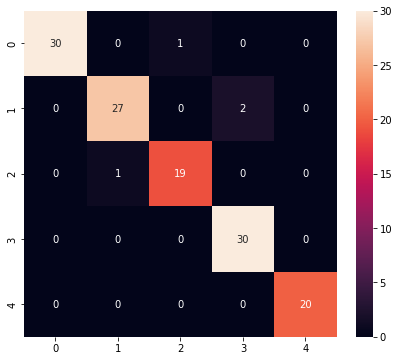

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.96      0.93      0.95        29
           2       0.95      0.95      0.95        20
           3       0.94      1.00      0.97        30
           4       1.00      1.00      1.00        20

    accuracy                           0.97       130
   macro avg       0.97      0.97      0.97       130
weighted avg       0.97      0.97      0.97       130



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [38]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [39]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/sc/kvywjrhx7yx5yz5grbfpydk80000gn/T/tmpuz30iifs/assets


INFO:tensorflow:Assets written to: /var/folders/sc/kvywjrhx7yx5yz5grbfpydk80000gn/T/tmpuz30iifs/assets
2022-06-17 18:19:17.513478: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-06-17 18:19:17.513589: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-06-17 18:19:17.514993: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/sc/kvywjrhx7yx5yz5grbfpydk80000gn/T/tmpuz30iifs
2022-06-17 18:19:17.519741: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-06-17 18:19:17.519831: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/sc/kvywjrhx7yx5yz5grbfpydk80000gn/T/tmpuz30iifs
2022-06-17 18:19:17.545422: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-06-17 18:19:17.770285: I tensorflow/cc/saved_model/loader.cc:212] Running initialization

6560

# 推論テスト

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 582 µs, sys: 1.19 ms, total: 1.77 ms
Wall time: 1.74 ms


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.6754565e-05 4.7265045e-02 9.4123846e-01 8.5692396e-03 2.8804860e-03]
2


 343884 microseconds.
